In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [220]:
# load csv files in Google Drive 
model = 'efficientnet_b1'
df = pd.read_csv(f'{model}_log.csv', index_col=False) 
df

,Model Name,Dataset,Quantization Batch Size,Original Top1 Accuracy,Quantized Top1 Accuracy,Original Top5 Accuracy,Quantized Top5 Accuracy,Bits,MLP_Alphabet_Scalar,CNN_Alphabet_Scalar,MLP_Percentile,CNN_Percentile,Include 0,Retain_rate,Seed,Author
0,efficientnet_b1,ILSVRC2012,32,0.7761,0.00720,0.93596,0.01922,4,1.6,1.6,1.0,1.0,True,0.25,0,Jinjie
1,efficientnet_b1,ILSVRC2012,64,0.7761,0.03402,0.93596,0.09016,4,1.6,1.6,1.0,1.0,True,0.25,0,Jinjie
2,efficientnet_b1,ILSVRC2012,128,0.7761,0.40880,0.93596,0.65546,4,1.6,1.6,1.0,1.0,True,0.25,0,Jinjie
3,efficientnet_b1,ILSVRC2012,256,0.7761,0.65500,0.93596,0.85958,4,1.6,1.6,1.0,1.0,True,0.25,0,Jinjie
4,efficientnet_b1,ILSVRC2012,512,0.7761,0.70982,0.93596,0.89778,4,1.6,1.6,1.0,1.0,True,0.25,0,Yixuan
5,efficientnet_b1,ILSVRC2012,1024,0.7761,0.73106,0.93596,0.91234,4,1.6,1.6,1.0,1.0,True,0.25,0,Yixuan
6,efficientnet_b1,ILSVRC2012,32,0.7761,0.02338,0.93596,0.06616,5,1.6,1.6,1.0,1.0,True,0.25,0,Yixuan
7,efficientnet_b1,ILSVRC2012,64,0.7761,0.48672,0.93596,0.72292,5,1.6,1.6,1.0,1.0,True,0.25,0,Yixuan
8,efficientnet_b1,ILSVRC2012,128,0.7761,0.71810,0.93596,0.90052,5,1.6,1.6,1.0,1.0,True,0.25,0,Yixuan
9,efficientnet_b1,ILSVRC2012,256,0.7761,0.74488,0.93596,0.91790,5,1.6,1.6,1.0,1.0,True,0.25,0,Yixuan


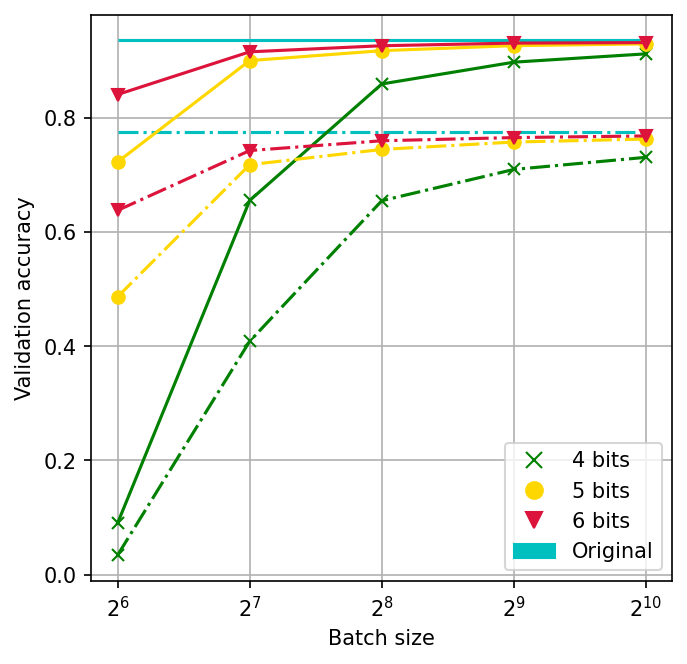

In [223]:
fig, ax = plt.subplots(figsize=(5,5), dpi=150)
bit_list = [4, 5, 6]
marker_list = ['x', 'o', 'v']
color_list = ['g', 'gold', 'crimson']
color_line = 'c'
start_index = 1  # used to filter out bad resutls due to small batch size

for i, bit in enumerate(bit_list):
    df_temp = df[df['Bits']==bit].sort_values(by='Quantization Batch Size')
    bs = df_temp['Quantization Batch Size'].values[start_index:]
    for j in [1, 5]:
        acc = df_temp[f'Quantized Top{j} Accuracy'][start_index:]
        if j == 1:
            ax.plot(bs, acc, color=color_list[i], marker=marker_list[i], linestyle='-.')
        elif j == 5:
            ax.plot(bs, acc, color=color_list[i], marker=marker_list[i], linestyle='-')

ax.hlines(y=df_temp.iloc[0, 3], xmin=bs[0], xmax=bs[-1], linestyles='-.', color=color_line)
ax.hlines(y=df_temp.iloc[0, 5], xmin=bs[0], xmax=bs[-1], linestyles='-', color=color_line) 

patche = mpatches.Patch(color=color_line, label='Original')
legend_list = [mlines.Line2D([], [], color=color_list[i], marker=marker_list[i], linestyle='None',
                          markersize=8, label=f'{bit_list[i]} bits') for i in range(len(bit_list))]
legend_list.append(patche)
ax.legend(handles=legend_list, loc='lower right')
#ax.set_yscale('log', base=10)
ax.set_xscale('log', base=2)
ax.grid()
ax.set_xlabel('Batch size')
ax.set_ylabel('Validation accuracy')
plt.savefig(f'{model}_fig.png')